### Time series modelling 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

**Introduction:** 

In this exercise, you will focus on the Best Linear Unbiased Estimation (BLUE). With BLUE, if the components of the time series are known, you can use the linear model of observations to estimate these components. 

**Exercise:** 

In this excercise, you calculate the BLUE estimates. First, create your matrix $A$ and $\Sigma_{Y}$ which need to have dimensions of 501x5 (501: rows and 5 columns) and 501x501 respectively. Can you explain what these 5 parameters are? For $\Sigma_{Y}$, you can use the np.eye function from numpy. Having defined these two matrices, we can obtain the BLUE estimats of 

$$
\hat{X}=(A^T \Sigma_{Y}^{-1}A)^{-1}A^T \Sigma_{Y}^{-1}Y,\, \, \hat{Y}=...,\, \, \hat{\epsilon}=...
$$ 

along with their covariance matrices $\Sigma_{\hat{X}}=(A^T \Sigma_{Y}^{-1}A)^{-1}$, $\Sigma_{\hat{Y}}=...$ and $\Sigma_{\hat{\epsilon}}=...$. 

After you have estimated the $\hat{X}$ (having 5 elements), we you can compare each element of the $\hat{x}$ with the corresponding values from the original time series you simulated ($y_0$, $r$, $A_m$, $\phi$, $o_k$). The precision of the parameters can also be obtained from $\Sigma_{\hat{X}}$. You may also want to follow hypothesis tests to test the statistical significance of the estimated parameters. 

Please note that $A_m$ has been previously defined as $A$, but for avoiding confusion with the $A$ matrix has been renamed.

**Note:**

You don't need to focus on the next cell, it contains the code included in the [Time series components exercise](https://mude.citg.tudelft.nl/book/time_series/exercise1.html#) for creating the time series.

In [2]:
np.random.seed(0)  # For reproducibility

# create observations
time = np.arange(501) 
m = len(time)
y_0 = 1 
r = 0.02 
y1 = y_0 + r*time 

# introduce a seasonality
omega = 2 * np.pi/100 
Am = 1 
phi_0 = 0.2*np.pi
y2 = y1 + Am*np.sin(omega * time + phi_0) 

# introduce offset
t_k = 300 
O_k = 5 
y3 = y2.copy() 
y3[t_k:] = y3[t_k:] + O_k

# introduce random error
mean = 0 
sigma = 0.5 
et = np.random.normal(loc = mean, scale = sigma, size = m) 
y4 = y3 + et 

We first create the $A$ matrix which is based on linear regression and seasonality. We then include the offset in a new column and consequently create the covariance matrix $\Sigma_Y$. 

In [3]:
A = np.stack((np.ones(m), time, np.cos(omega*time), np.sin(omega*time)), axis=1)
u = np.zeros(m)
u[t_k:] = 1
A = np.column_stack((A,u))
Sigma_Y = (sigma**2) * np.eye(m) 

We can now implement BLUE, meaning that we compute $\hat X$, $\hat Y$, \hat \psilon$ and the covariance matrix $\Sigma_{\hat{X}}$.

In [4]:
Xhat = np.linalg.inv(A.T @ np.linalg.inv(Sigma_Y) @ A) @ A.T @ np.linalg.inv(Sigma_Y) @ y4
Yhat = A @ Xhat 
ehat = y4 - Yhat 
Sigma_xhat = np.linalg.inv(A.T @ np.linalg.inv(Sigma_Y) @ A)

We then compare the observed (true) values of $y_0, r, A_m, \phi_0$ and $o_k$ with the predicted ones.

In [5]:
# Comparisons of xhat with the initial (true) values x:
y_0_hat = Xhat[0] # compare with y_0
print('y0: True value is:', y_0,',  Estimated value is:', y_0_hat)
r_hat = Xhat[1]   # compare with r
print('r: True value is:', r,',  Estimated value is:', r_hat)

Am_hat = np.sqrt(Xhat[2]**2 + Xhat[3]**2) # compare with Am
print('Am: True value is:', Am,',  Estimated value is:', Am_hat)

phi_0_hat = np.arctan(Xhat[2]/Xhat[3]) # compare with phi_0
print('phi0: True value is:', phi_0,',  Estimated value is:', phi_0_hat)

O_k_hat = Xhat[4]  # compare with O_k
print('Ok: True value is:', O_k,',  Estimated value is:', O_k_hat)

y0: True value is: 1 ,  Estimated value is: 1.0108670424241462
r: True value is: 0.02 ,  Estimated value is: 0.020019382911012216
Am: True value is: 1 ,  Estimated value is: 1.0971057283981793
phi0: True value is: 0.6283185307179586 ,  Estimated value is: 0.6899387295464864
Ok: True value is: 5 ,  Estimated value is: 4.929702224035133


We can now plot the observed and estimated time series. 

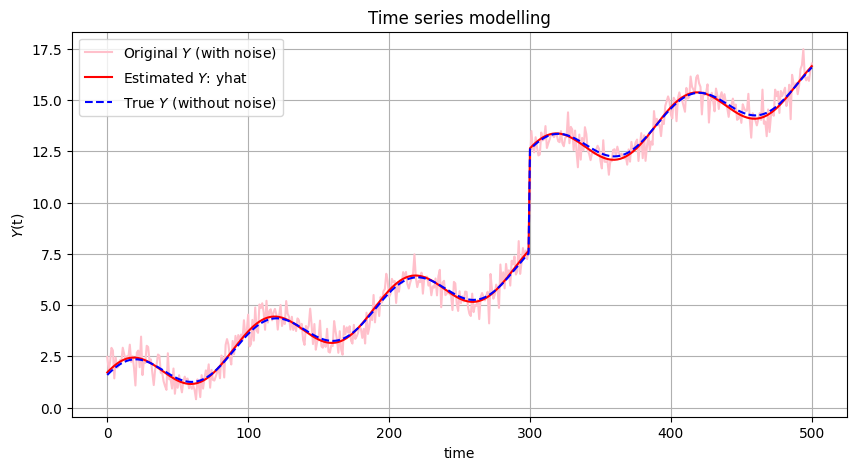

In [6]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(time, y4, label='Original $Y$ (with noise)', color='pink')
plt.plot(time, Yhat, label='Estimated $Y$: yhat', color='r')
plt.plot(time, y3, label='True $Y$ (without noise)', linestyle='--', color='b')
plt.title('Time series modelling')
plt.ylabel('$Y$(t)')
plt.xlabel('time')
plt.legend();